# Lunar Observation Links:

* https://lunar.gsfc.nasa.gov/
* https://api.nasa.gov/
* https://www.lpi.usra.edu/resources/mapcatalog/LMP/
* https://wms.lroc.asu.edu/
* https://target.lroc.asu.edu/

# Modules

In [ ]:
%%capture
!pip install skyfield

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from scipy import ndimage
from skimage import io as ioS
from PIL import Image as ImagePIL
from io import BytesIO
import requests
from skyfield.api import PlanetaryConstants,load,Topos
from skyfield import almanac
plt.style.use("dark_background")
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/driveFiles')

Mounted at /content/driveFiles


In [6]:
from google.colab import userdata

# Constant

In [8]:
NASAAPIKey = userdata.get("NASA_API_KEY")

# Moon Image

In [5]:
exampleImagePath = "/content/driveFiles/MyDrive/Astronomy/Project Data/image_file/moon/mymoon.jpg"

In [9]:
moonImage = ioS.imread(exampleImagePath)

In [11]:
moonImage.shape

(2064, 1935, 3)

In [12]:
# change this angle from 225 degrees
moonImageRotate = ndimage.rotate(moonImage,225)

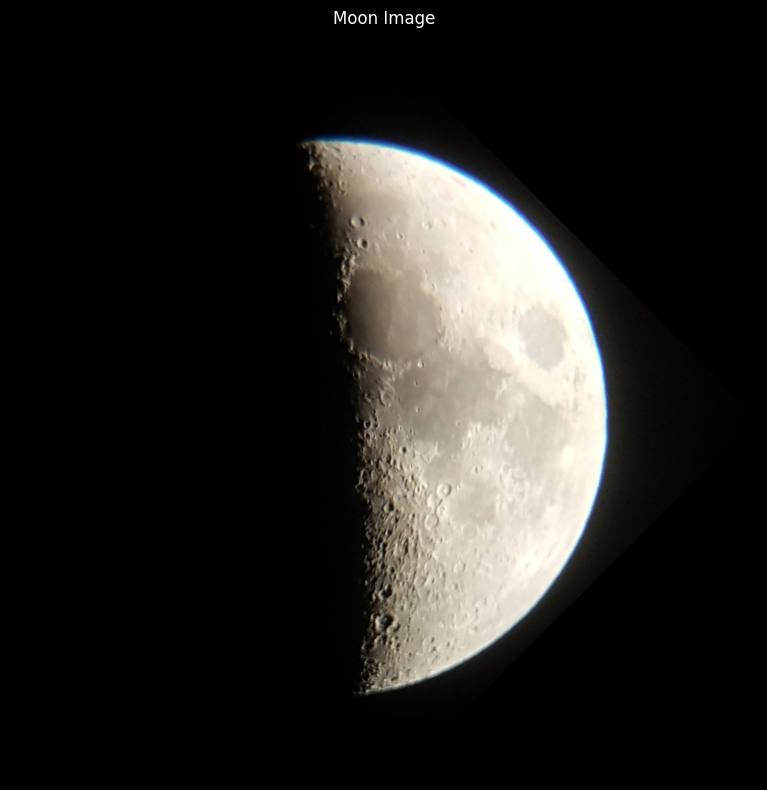

In [13]:
figure,axs = plt.subplots(figsize=(8,8))
axs.imshow(moonImageRotate)
axs.set_title("Moon Image")
axs.axis("off")
plt.tight_layout()
plt.show()

## Annotate

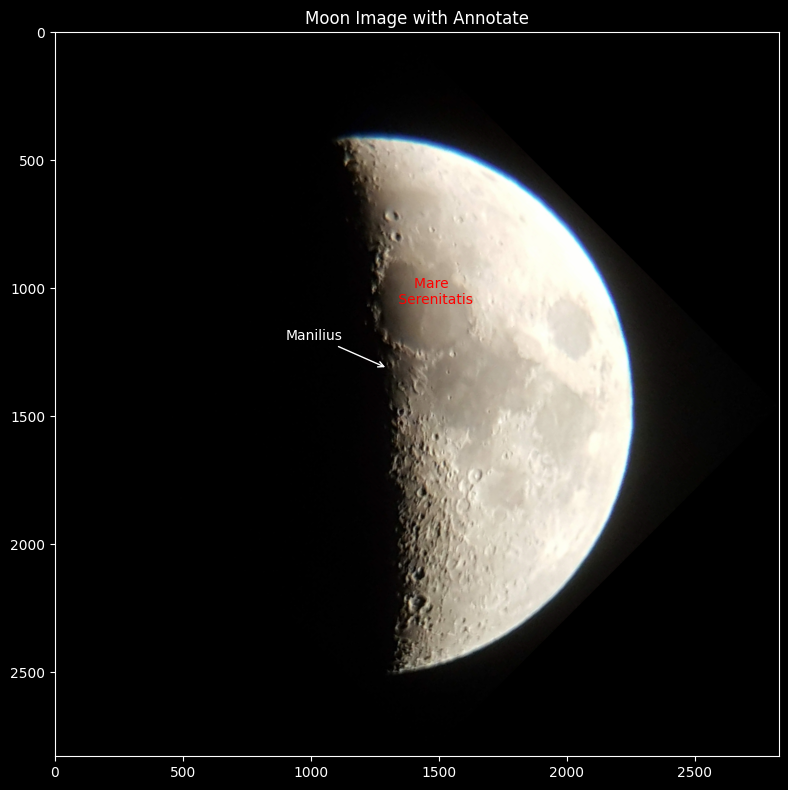

In [16]:
figure,axs = plt.subplots(figsize=(8,8))
axs.imshow(moonImageRotate)
axs.set_title("Moon Image with Annotate")
axs.annotate("Manilius",xy=(1300,1312),xycoords="data",xytext=(900,1200),textcoords="data",color="white",arrowprops=dict(arrowstyle="->",color="white"))
axs.text(1480,1060,"Mare \n Serenitatis",color="red",ha="center")
plt.tight_layout()
plt.show()

# NASA - API

## APOD

In [17]:
endpointNASA = f"https://api.nasa.gov/planetary/apod?api_key={NASAAPIKey}"

In [19]:
response = requests.get(endpointNASA,timeout=300,allow_redirects=True,stream=True)

In [20]:
if response.status_code == 200:
  data = response.json()

In [21]:
data

{'date': '2024-01-21',
 'explanation': "Yes, but can your blizzard do this? In the Upper Peninsula of Michigan's Storm of the Century in 1938, some snow drifts reached the level of utility poles. Nearly a meter of new and unexpected snow fell over two days in a storm that started 86 years ago this week.  As snow fell and gale-force winds piled snow to surreal heights, many roads became not only impassable but unplowable; people became stranded, cars, school buses and a train became mired, and even a dangerous fire raged. Two people were killed and some students were forced to spend several consecutive days at school.  The featured image was taken by a local resident soon after the storm. Although all of this snow eventually melted, repeated snow storms like this help build lasting glaciers in snowy regions of our planet Earth.",
 'hdurl': 'https://apod.nasa.gov/apod/image/2401/snowpoles_brinkman_960.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'The Upper Michigan B

In [22]:
imageURL = data.get("url")
imageTitle = data.get("title")
imageExplanation = data.get("explanation")

In [29]:
print(imageExplanation)

Yes, but can your blizzard do this? In the Upper Peninsula of Michigan's Storm of the Century in 1938, some snow drifts reached the level of utility poles. Nearly a meter of new and unexpected snow fell over two days in a storm that started 86 years ago this week.  As snow fell and gale-force winds piled snow to surreal heights, many roads became not only impassable but unplowable; people became stranded, cars, school buses and a train became mired, and even a dangerous fire raged. Two people were killed and some students were forced to spend several consecutive days at school.  The featured image was taken by a local resident soon after the storm. Although all of this snow eventually melted, repeated snow storms like this help build lasting glaciers in snowy regions of our planet Earth.


In [25]:
imageResponse = requests.get(imageURL,stream=True)
image = ImagePIL.open(BytesIO(imageResponse.content))

In [27]:
image.size

(960, 764)

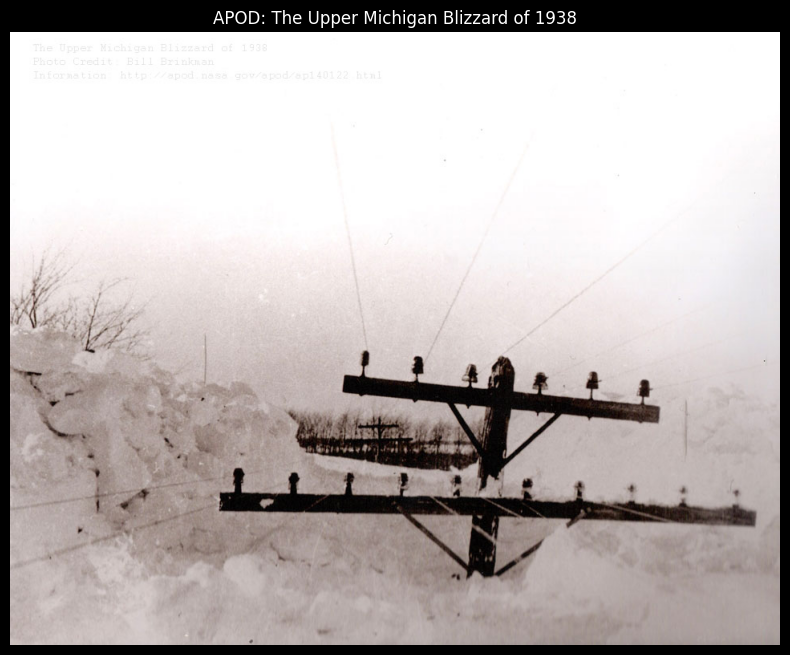

In [28]:
plt.figure(figsize=(8,8))
plt.title(f"APOD: {imageTitle}")
plt.axis("off")
plt.imshow(image)
plt.tight_layout()
plt.show()

## NASA Image

In [31]:
imageNASAURL = "https://images-api.nasa.gov/search?q=apollo%2011&description=moon"

In [32]:
imageRequest = requests.get(imageNASAURL,stream=True,allow_redirects=True)

In [33]:
if imageRequest.status_code == 200:
  data = imageRequest.json()

In [37]:
data.keys()

dict_keys(['collection'])

In [38]:
collections = data["collection"]

In [39]:
type(collections)

dict

In [40]:
collections.keys()

dict_keys(['version', 'href', 'items', 'metadata', 'links'])

In [41]:
collections["href"]

'http://images-api.nasa.gov/search?q=apollo%2011&description=moon'

In [42]:
collections["links"]

[{'rel': 'next',
  'prompt': 'Next',
  'href': 'http://images-api.nasa.gov/search?q=apollo+11&description=moon&page=2'}]

In [44]:
len(collections["items"])

100

In [45]:
exampleItem = collections["items"][0]

In [46]:
exampleItem

{'href': 'https://images-assets.nasa.gov/video/Apollo 11 Overview/collection.json',
 'data': [{'center': 'HQ',
   'title': 'Apollo 11 Overview',
   'keywords': ['Apollo 11', 'Moon'],
   'nasa_id': 'Apollo 11 Overview',
   'date_created': '2013-05-15T00:00:00Z',
   'media_type': 'video',
   'description': 'Video highlights from the historic first manned landing on the moon, during the Apollo 11 mission in July 1969.'}],
 'links': [{'href': 'https://images-assets.nasa.gov/video/Apollo 11 Overview/Apollo 11 Overview~thumb.jpg',
   'rel': 'preview',
   'render': 'image'},
  {'href': 'https://images-assets.nasa.gov/video/Apollo 11 Overview/Apollo 11 Overview.srt',
   'rel': 'captions'}]}

In [47]:
imageMoonApollo = exampleItem["links"][0]["href"]

In [52]:
imageMoonDescription = exampleItem["data"][0]["description"]

In [53]:
imageMoonDescription

'Video highlights from the historic first manned landing on the moon, during the Apollo 11 mission in July 1969.'

In [48]:
imageMoonApollo

'https://images-assets.nasa.gov/video/Apollo 11 Overview/Apollo 11 Overview~thumb.jpg'

In [49]:
imageContent = requests.get(imageMoonApollo,stream=True).content
image = ImagePIL.open(BytesIO(imageContent))

In [51]:
image.size

(300, 221)

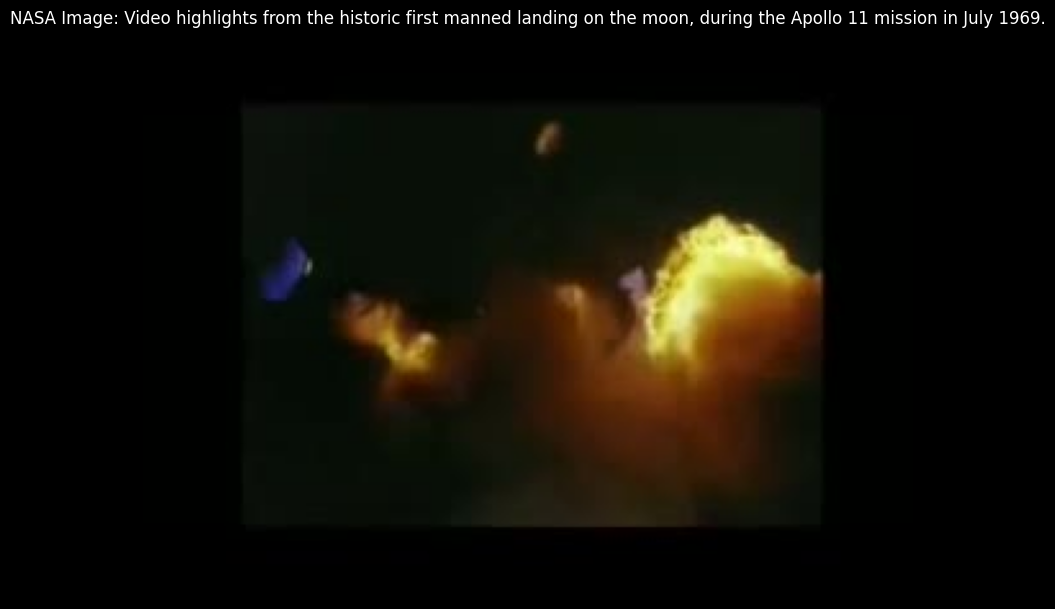

In [54]:
plt.figure(figsize=(8,8))
plt.title(f"NASA Image: {imageMoonDescription}")
plt.axis("off")
plt.imshow(image)
plt.tight_layout()
plt.show()

# Crater Width

* Crater width, in the context of impacts on planetary surfaces like the Moon or Earth, refers to the diameter of the crater formed by an impact. The size of an impact crater depends on several factors, including the size, velocity, and angle of the impacting object, as well as the geological characteristics of the surface being impacted.
* One of the simplest models to estimate the diameter of an impact crater is given by the formula:
  > $D = k \times (\frac{E}{p})^{1/3}$

  where:

  $D$: diameter of the crater

  $k$: constant that depends on the gravity of the planet and the density of the impacting object and the surface

  $E$: kinetic energy of the impacting object

  $p$: density of the surface material

* We can calculate the resolution of our camera:
  > $Resolution_{\text{arc seconds per pixel}} = \frac{\text{Pixel Size}_{micrometer}}{\text{focal length}_{milimeter}} \times 206.265$

For more information: https://astronomy.tools/calculators/ccd_suitability

In [55]:
def CalculateCraterDiameter(k:int or float,E:int or float,rho:int or float)->int or float:
  """
    Calculate the diameter of an impact crater.

    Parameters:
    k (float): A constant dependent on planetary gravity and densities.
    E (float): Kinetic energy of the impacting object (in joules).
    rho (float): Density of the surface material (in kg/m^3).

    Returns:
    float: Diameter of the crater (in meters).
  """
  return k*(E/rho)**(1/3)

In [56]:
# Kinetic energy (E) = 0.5 * m * v^2
massExample = 10000 # kg
velocityExample = 20000 # m/s
kineticEnergy = 0.5*massExample*velocityExample**2
densityExample = 2500 # Density of surface in kg/m^3
constantEarthImpact = 0.07 # k, Constant for Earth impacts

In [58]:
diameterCrater = CalculateCraterDiameter(constantEarthImpact,kineticEnergy,densityExample)
print(f"Diameter of Crater: {diameterCrater} with impact velocity: {velocityExample} m/s and mass of object: {massExample} kg")

Diameter of Crater: 64.98224367057888 with impact velocity: 20000 m/s and mass of object: 10000 kg


## Pixel Resolution

In [59]:
def PixelResolution(pixelSize:int or float,focalLength:int or float,inputPixelSize:int or float)->int or float:
  resolution = pixelSize/focalLength*206.265*inputPixelSize
  return resolution

In [60]:
pixelSize = 1.12 # micro m
focalLength = 1300 # mm
smartphonePixel = 4.3 # mm

In [61]:
resolution = PixelResolution(pixelSize,focalLength,smartphonePixel)
print(f"Resolution: {resolution}")

Resolution: 0.7641324923076923


# Skyfield Application - Moon Distance

In [62]:
timeScale = load.timescale(builtin=True)

In [64]:
# time of observation - year, month, day, hour, min
utcTime = timeScale.utc(2023,1,3,10,10)

In [67]:
utcTime

<Time tt=2459947.924411852>

In [66]:
utcTime.tt # GPS Time

2459947.924411852

In [68]:
ephData = load('de421.bsp')

[#################################] 100% de421.bsp


In [69]:
earthData,moonData = ephData["earth"],ephData["moon"]

In [71]:
moonBase = load('moon_080317.tf')

[#################################] 100% moon_080317.tf


In [72]:
pckBase = load('pck00008.tpc')

[#################################] 100% pck00008.tpc


In [73]:
moonCoordBase = load('moon_pa_de421_1900-2050.bpc')

[#################################] 100% moon_pa_de421_1900-2050.bpc


In [76]:
planetaryConstants = PlanetaryConstants()
planetaryConstants.read_text(moonBase)
planetaryConstants.read_text(pckBase)
planetaryConstants.read_binary(moonCoordBase)

In [80]:
# variable to the name of the crater
# South lats and W longs are entered as negative numbers
frame = planetaryConstants.build_frame_named("MOON_ME_DE421")
theophilus = moonData+planetaryConstants.build_latlon_degrees(frame,26.4,-11.4)

In [83]:
theophilus

<VectorSum of 3 vectors:
 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 3 EARTH BARYCENTER
 'de421.bsp' segment 3 EARTH BARYCENTER -> 301 MOON
 PlanetTopos 301 MOON -> PlanetTopos>

In [82]:
apparent = earthData.at(utcTime).observe(theophilus).apparent()

In [86]:
ra,dec,distance = apparent.radec(epoch="date")
print(f"Distance: {distance}")

Distance: 0.00265629 au


In [88]:
kmDistance = distance.km
print(f"Distance: {kmDistance} km")

Distance: 397375.8067691126 km


# Skyfield Application - Moon Rise/Set

In [117]:
ephemeris = load('de440.bsp')

[#################################] 100% de440.bsp


In [118]:
observerLocation = Topos('40.7128 N','74.0060 W') # New York City

In [122]:
earthData = ephemeris["earth"]

In [123]:
moonData = ephemeris["moon"]

In [124]:
observer = earthData+observerLocation

In [125]:
nowTime = timeScale.now() # current time

In [126]:
nowTime

<Time tt=2460331.0354716238>

In [127]:
astrometricData = observer.at(nowTime).observe(ephemeris["moon"])

In [128]:
alt,az,distance = astrometricData.apparent().altaz()

In [129]:
if alt.degrees > 0:
  print(f"The Moon is currently above the horizon (Altitude: {alt.degrees:.2f} degrees)")
else:
  print(f"The Moon is currently below the horizon (Altitude: {alt.degrees:.2f} degrees)")

The Moon is currently below the horizon (Altitude: -23.05 degrees)


In [130]:
t0,t1 = nowTime,nowTime+24*3600 # Search for rise and set within the next 24 hours

In [131]:
t0

<Time tt=2460331.0354716238>

In [132]:
t1

<Time tt=2546731.0354716238>

In [133]:
almanacData = almanac.risings_and_settings(ephemeris,moonData,observerLocation)

In [134]:
almanacData.step_days

0.25

In [ ]:
times,events = almanac.find_discrete(t0,t1,almanacData) # it takes time, please wait

In [ ]:
for t,e in zip(times,events):
  name = "Rise" if e == 1 else "Set"
  print(f"{name} at {t.utc_strftime('%Y-%m-%d %H:%M:%S')}")